# envORF Exploration
Exploratory notebook looking at envORFs as annotated in [this paper](https://www.science.org/doi/full/10.1126/science.abq7871)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from plotnine import *
import sys
sys.path.append("../src/")
from src import legend_kwargs

eos = pd.read_csv("../processed-data/envorfs.txt", sep="\t", header=None)
eos.rename(columns={
    0 : "chrom",
    1 : "start",
    2 : "end",

}, inplace=True)
eos["chrom"] = [i[1] for i in eos["chrom"].str.split("chr")]
# Drop X and Y chroms
eos = eos.loc[
    (eos["chrom"] != "X") &
    (eos["chrom"] != "Y") &
    (eos["chrom"] != '6_cox_hap2') &
    (eos["chrom"] != '6_dbb_hap3')
    ]

eos["chrom"] = eos["chrom"].astype(int)
eos.head()

,chrom,start,end,3,4,5,6,7,8,9,10,11,12
0,1,3718559,3719552,HERVK13-int,6199.0,-,hg19_rmsk,exon,.,gene_id,HERVK13-int;,transcript_id,HERVK13-int_dup1;
1,1,4242679,4242934,HERVH-int,34034.0,-,hg19_rmsk,exon,.,gene_id,HERVH-int;,transcript_id,HERVH-int_dup2;
2,1,5110790,5111366,HERVH-int,28994.0,+,hg19_rmsk,exon,.,gene_id,HERVH-int;,transcript_id,HERVH-int;
3,1,6623059,6623614,HERVFH21-int,6639.0,-,hg19_rmsk,exon,.,gene_id,HERVFH21-int;,transcript_id,HERVFH21-int_dup3;
4,1,8956488,8957043,HERV9-int,19583.0,+,hg19_rmsk,exon,.,gene_id,HERV9-int;,transcript_id,HERV9-int;


In [61]:
# display(eos.head())
eos["len"] = eos["end"] - eos["start"]#["chrom"].value_counts()
eos[eos['chrom'] == 1].sort_values(by="len", ascending=False)
eos.sort_values(by="len", ascending=False).head()
eos.dtypes

chrom      int64
start      int64
end        int64
3         object
4        float64
5         object
6         object
7         object
8         object
9         object
10        object
11        object
12        object
len        int64
dtype: object

In [56]:
chromosomes

,chrom,length,x
0,1,249250621,0
1,2,243199373,0
2,3,198022430,0
3,4,191154276,0
4,5,180915260,0
5,6,171115067,0
6,7,159138663,0
7,8,146364022,0
8,9,141213431,0
9,10,135534747,0


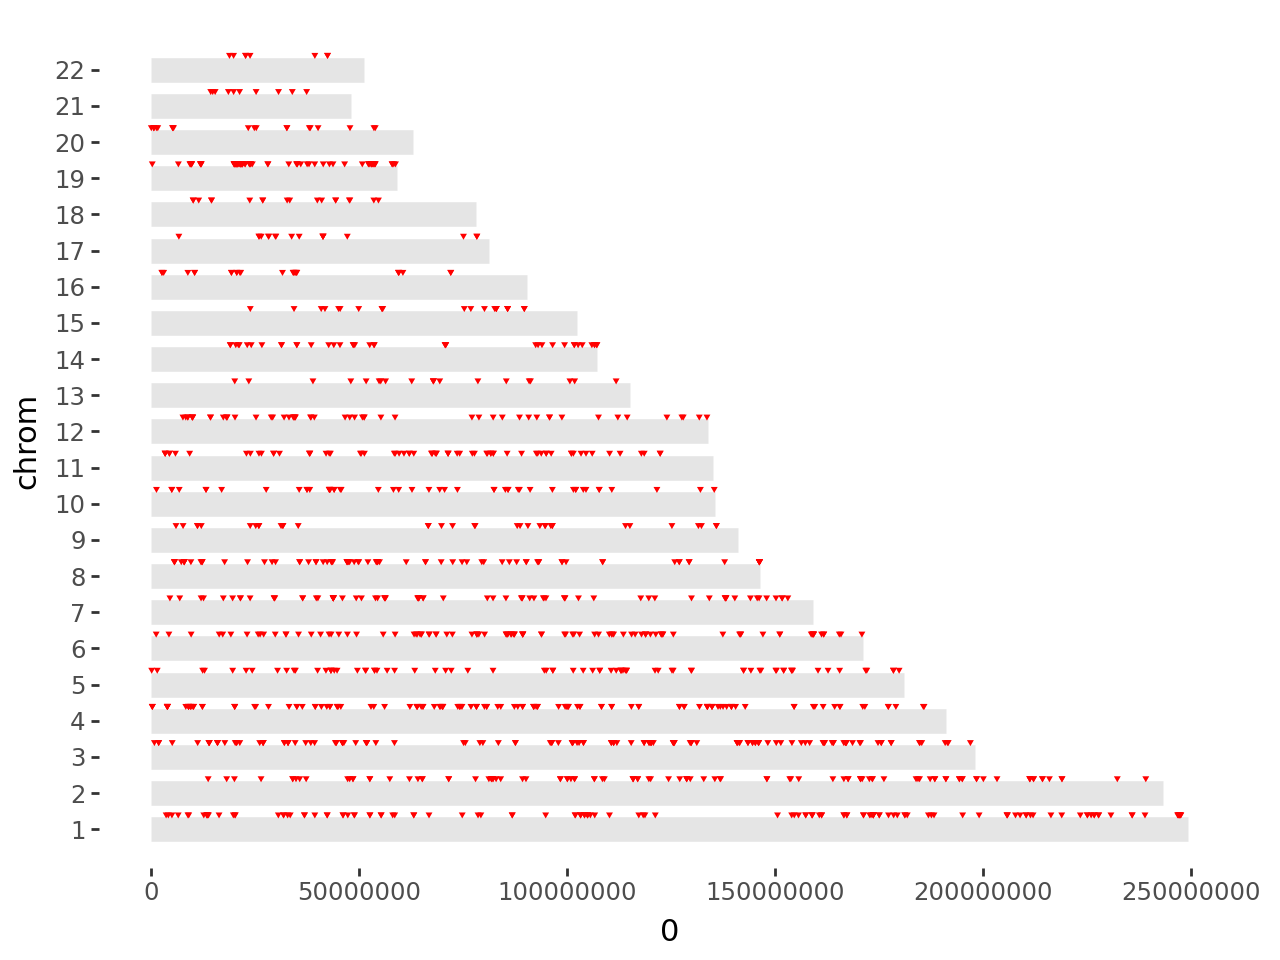

In [108]:
from matplotlib.patches import FancyArrowPatch

chromosomes = pd.read_csv("../src/chrom_lens.csv", index_col=0)
chromosomes.drop(['X', 'Y'], inplace=True)
chromosomes.reset_index(inplace=True)
chromosomes["chrom"] = chromosomes["chrom"].astype(int)
# chromosomes['x'] = 0

p1 = (
    ggplot()
    + geom_segment(
        aes(x=0, xend='length', y='chrom', yend='chrom'), 
        data=chromosomes, 
        color='grey', alpha=.2, size=5)
    # + geom_segment(
    #     aes(x='start', xend='end', y='chrom', yend='chrom'),
    #     color='red', 
    #     size=5, 
    #     data=eos)
    + geom_segment(
        aes(x='end', xend='end', y='chrom+.5', yend='chrom+.3'),  # Very short segment
        arrow=arrow(type='closed', length=0.03),  # Tip of the arrow
        color='red',  # Red arrow color
        size=0.0,  # Thinner line
        data=eos)

    + scale_y_continuous(breaks=range(1, 23))
    # + labs(x="Position [bp]", y="Chromosome", color="Ancestry", title="envORFs")
    + theme_bw()
    + theme(panel_grid_major=element_blank(),  # Remove major gridlines
            panel_grid_minor=element_blank(),
            panel_border=element_blank())
)

# p1.save(filename="../scratch/envorf_chroms.png", dpi=1000, width=10, height=6)
p1.show()


[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22  3  4  5  6  7  8  9]


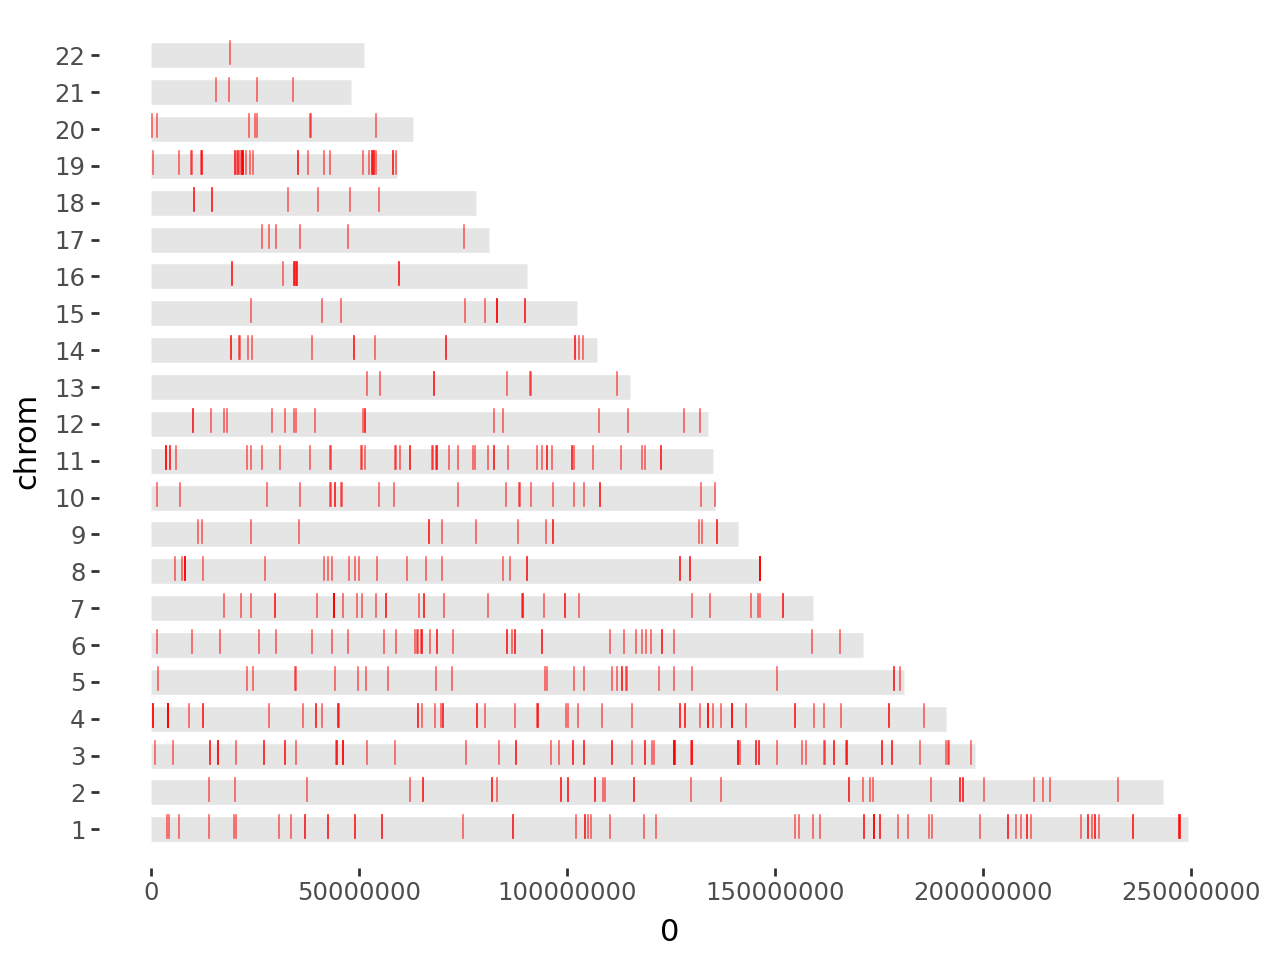

In [63]:
# Ensure data types are consistent
eos['chrom'] = eos['chrom'].astype(int)

# Check unique chromosomes
print(eos['chrom'].unique())

# Create the plot
p1 = (
    ggplot()
    + geom_segment(
        aes(x=0, xend='length', y='chrom', yend='chrom'), 
        data=chromosomes, 
        color='grey', alpha=.2, size=5)
    + geom_segment(
        aes(x='start', xend='end+100000', y='chrom + 0.1', yend='chrom + 0.1'),
        color='red', 
        size=5, 
        data=eos)
    + scale_y_continuous(breaks=range(1, 23))
    + xlim(0, chromosomes['length'].max())  # Adjust x-limits
    + theme_bw()
    + theme(panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            panel_border=element_blank())
)

p1.show()
